In [6]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [10]:
#For reading stock data from the internet using pandas
from pandas.io.data import DataReader

In [12]:
from datetime import datetime

In [14]:
from __future__ import division #To handle float numbers

In [16]:
# List of technology stocks - Apple, Google, Microsoft and Amazon
tech_list = ['AAPL','GOOG','MSFT','AMZN'] 

In [18]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [20]:
# Taking stock data from yahoo financing website with given start and end dates

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [58]:
#Let us see the stock data now
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Returns
Date,,,,,,,,,,
2015-12-28,107.589996,107.690002,106.180000,106.820000,26704200,104.495069,NaN,NaN,NaN,NaN
2015-12-29,106.959999,109.430000,106.860001,108.739998,30931200,106.373279,NaN,NaN,NaN,0.017974
2015-12-30,108.580002,108.699997,107.180000,107.320000,25213800,104.984187,NaN,NaN,NaN,-0.013059
2015-12-31,107.010002,107.029999,104.820000,105.260002,40635300,102.969025,NaN,NaN,NaN,-0.019195
2016-01-04,102.610001,105.370003,102.000000,105.349998,67649400,103.057063,NaN,NaN,NaN,0.000855


In [22]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,104.409012,105.328735,103.584822,104.502134,3.846013e+07,103.462819
std,7.459260,7.432907,7.553618,7.522509,1.699955e+07,7.895271
min,90.000000,91.669998,89.470001,90.339996,1.142440e+07,89.394274
25%,97.320000,98.209999,96.580002,97.139999,2.696460e+07,95.855921
50%,105.519997,106.309998,104.820000,105.709999,3.368680e+07,104.176902
75%,110.120003,111.190002,109.419998,110.440002,4.439280e+07,109.989998
max,118.180000,118.690002,117.449997,118.250000,1.333697e+08,117.645979


In [23]:
#Basic Information of the Apple Data
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-12-28 to 2016-12-27
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


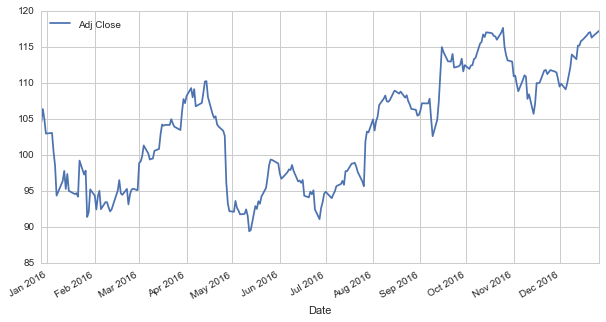

In [24]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,5))

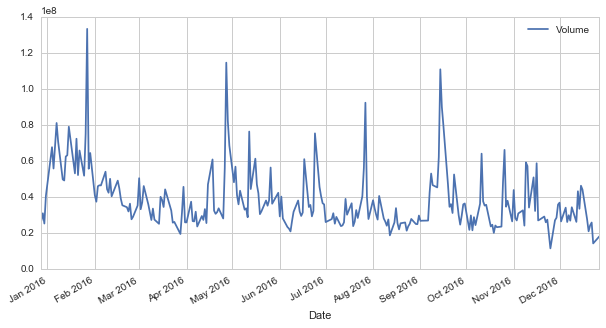

In [25]:
AAPL['Volume'].plot(legend=True,figsize=(10,5))

In [26]:
ma_days = [10,20,50]

for ma in ma_days:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

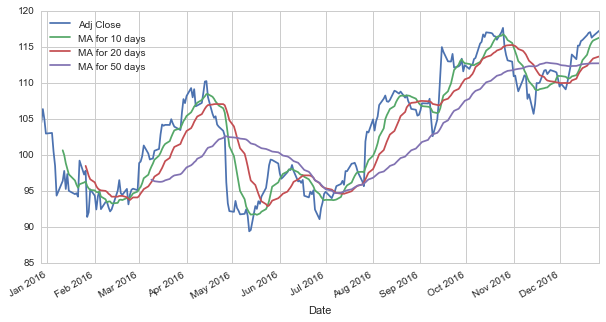

In [27]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,5))

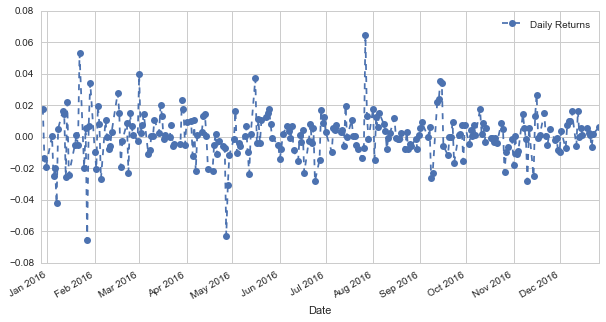

In [28]:
AAPL['Daily Returns'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Returns'].plot(figsize=(10,5),legend=True,linestyle='--',marker='o')

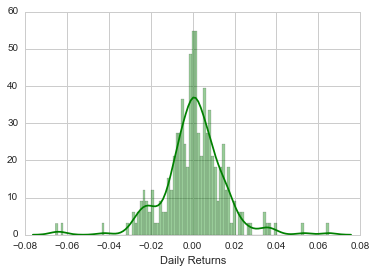

In [29]:
# distplot helps to place 2 plots on top of each other
sns.distplot(AAPL['Daily Returns'].dropna(),bins=100,color='green')

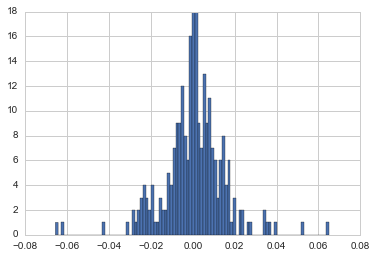

In [30]:
AAPL['Daily Returns'].hist(bins=100)

In [31]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [32]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-12-28,104.495069,675.200012,762.510010,54.455724
2015-12-29,106.373279,693.969971,776.599976,55.039699
2015-12-30,104.984187,689.070007,771.000000,54.806110
2015-12-31,102.969025,675.890015,758.880005,53.998276
2016-01-04,103.057063,636.989990,741.840027,53.336436


In [33]:
tech_returns = closing_df.pct_change()

In [34]:
tech_returns.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-12-28,NaN,NaN,NaN,NaN
2015-12-29,0.017974,0.027799,0.018478,0.010724
2015-12-30,-0.013059,-0.007061,-0.007211,-0.004244
2015-12-31,-0.019195,-0.019127,-0.015720,-0.014740
2016-01-04,0.000855,-0.057554,-0.022454,-0.012257


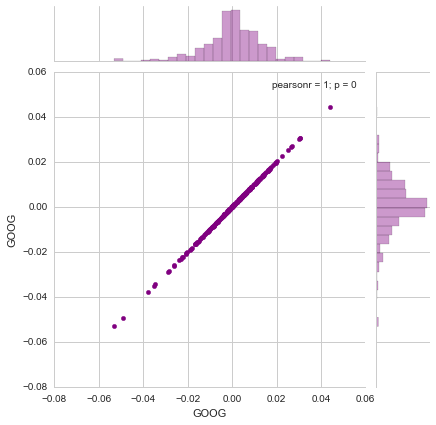

In [35]:
sns.jointplot('GOOG','GOOG',tech_returns,kind = 'scatter',color = 'purple')


Above plot is perfectly linear because we compared Google to Google with pearsonr value equals to 1

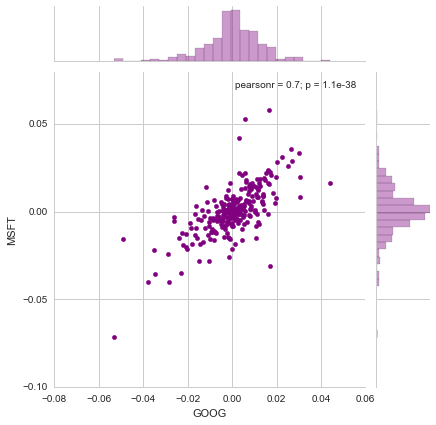

In [36]:
# Now we will check any correlation exists between selected stocks
sns.jointplot('GOOG','MSFT',tech_returns,kind = 'scatter', color = 'purple')

In [37]:
tech_returns.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-12-28,NaN,NaN,NaN,NaN
2015-12-29,0.017974,0.027799,0.018478,0.010724
2015-12-30,-0.013059,-0.007061,-0.007211,-0.004244
2015-12-31,-0.019195,-0.019127,-0.015720,-0.014740
2016-01-04,0.000855,-0.057554,-0.022454,-0.012257


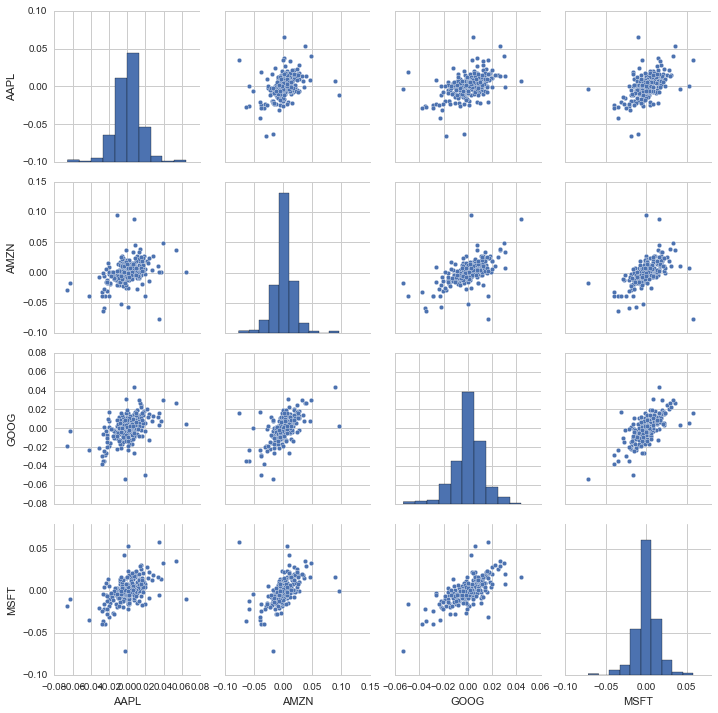

In [38]:
sns.pairplot(tech_returns.dropna())

Pair Plots to see the correlation between different stocks over time

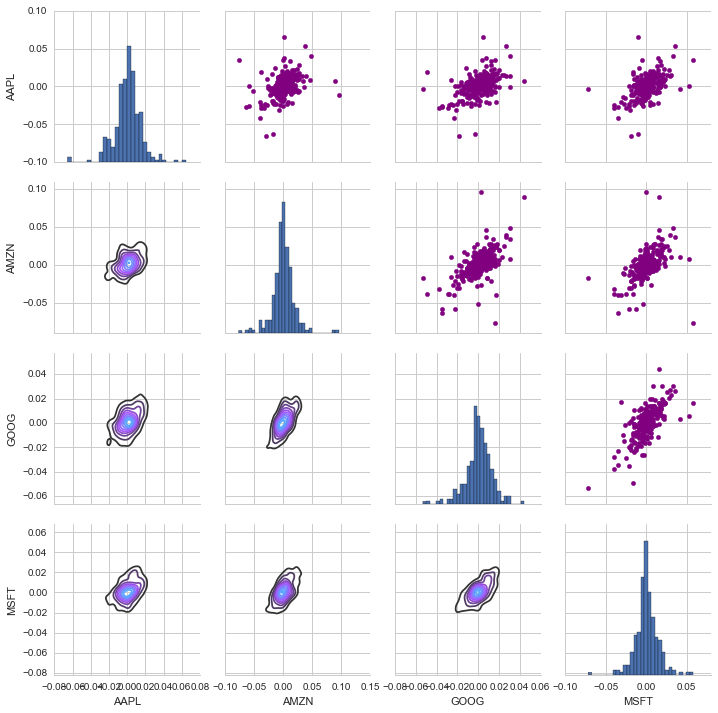

In [39]:
returns_fig = sns.PairGrid(tech_returns.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

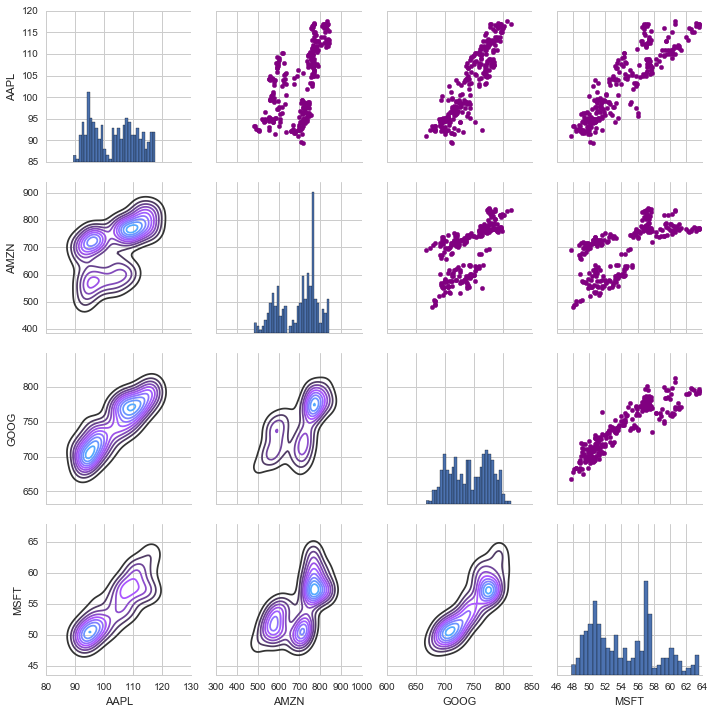

In [40]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [41]:
import seaborn.linearmodels as sbl

C:\Users\dines_000\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\dines_000\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


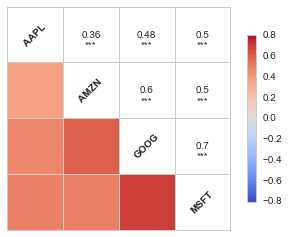

In [42]:
sbl.corrplot(tech_returns.dropna(),annot=True)

From above correlation plot we can assume that Google is strongly correlated with Microsoft

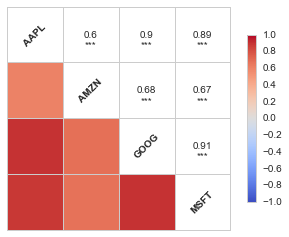

In [43]:
sbl.corrplot(closing_df,annot=True)

We will Start the Risk Analysis Now

RISK ANALYSIS

Comparing expected return with the standard deviation of the daily returns

In [44]:
rets = tech_returns.dropna()

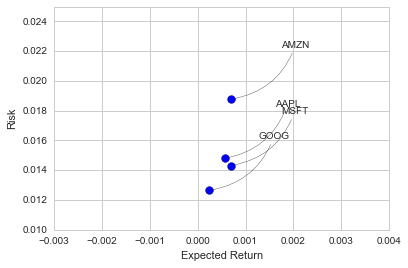

In [45]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

From this figure it is clear that Google stocks have higher expected return with lower risk. Where as the Amazon stocks have highest expected return with highest risk which is not safe compared to Google stocks

Next Value at Risk

In [46]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-12-29,0.017974,0.027799,0.018478,0.010724
2015-12-30,-0.013059,-0.007061,-0.007211,-0.004244
2015-12-31,-0.019195,-0.019127,-0.015720,-0.014740
2016-01-04,0.000855,-0.057554,-0.022454,-0.012257
2016-01-05,-0.025059,-0.005024,0.000998,0.004562


In [49]:
rets['AAPL'].quantile(0.05)

-0.023072312152486549

The 0.05 empirical quantile of daily returns is at -0.023. That means that with 95% confidence , our worst daily loss will not exceed 2.3%.

In [50]:
rets['AMZN'].quantile(0.05)

-0.028764640415175652

The 0.05 empirical quantile of daily returns is at -0.028. That means that with 95% confidence , our worst daily loss will not exceed 2.8%.

In [56]:
rets['GOOG'].quantile(0.05)

-0.021505210968908756

The 0.05 empirical quantile of daily returns is at -0.021. That means that with 95% confidence , our worst daily loss will not exceed 2.1%.

In [57]:
rets['MSFT'].quantile(0.05)

-0.020788339524316919

The 0.05 empirical quantile of daily returns is at -0.020. That means that with 95% confidence , our worst daily loss will not exceed 2.0%.

In [59]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [60]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [61]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-28,752.919983,762.989990,749.520020,762.510010,1515300,762.510010
2015-12-29,766.690002,779.979980,766.429993,776.599976,1765000,776.599976
2015-12-30,776.599976,777.599976,766.900024,771.000000,1293300,771.000000
2015-12-31,769.500000,769.500000,758.340027,758.880005,1489600,758.880005
2016-01-04,743.000000,744.059998,731.257996,741.840027,3272800,741.840027


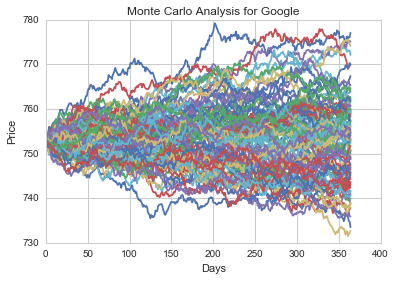

In [62]:
start_price = 752.91

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [64]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

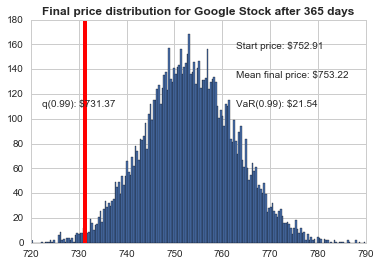

In [65]:
q = np.percentile(simulations, 1)
    
plt.hist(simulations,bins=200)


# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Value at risk(VaR) for each Google stock is $21.54 i.e, 99 % of the time we run monte carlo simulation the amount of money we lose on the stock at the most is 21.54 dollars.